# Chapter 4. The Discrete Wavelet Transform

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../src")
from DWT import get_DS, get_gamma, get_indices, get_nu, get_scaling, pyramid

## 4.1 Qualitative Description of the DWT

In [3]:
def test1(name_input, name_output, title):
    """
    Reproduce plots of Figure 62 from WMTSA

    Input:
        type name_input = string
        name_input = Name of file containing time series
        type name_output = string
        name_output = Name of image file containing the plot
        type title = string
        title = Title to add to the plot
    Output:
        None
    """
    X = np.loadtxt('../data/' + name_input)
    N = np.shape(X)[0]
    W = pyramid(X, 'Haar', 4)
    plt.figure(1, figsize=(10, 5))
    for i in range(0, N):
        plt.plot(np.array([i, i]), np.array([0.0, W[i]]), 'k-')
        plt.plot(i, W[i], 'ko')
    plt.axhline(0, color='k')
    plt.xlabel('n', fontsize=24)
    xticks_labels = []
    for i in range(0, N):
        xticks_labels.append(str(i))
    plt.xticks(np.arange(0, N), xticks_labels)
    plt.ylim([- 2.0, 2.0])
    plt.title(title)
    plt.savefig('../figures/DWT/' + name_output, format='eps')
    plt.show()

Compute DWT of the first time series from WMTSA.

Reproduce the upper plot of Figure 62 in WMTSA.

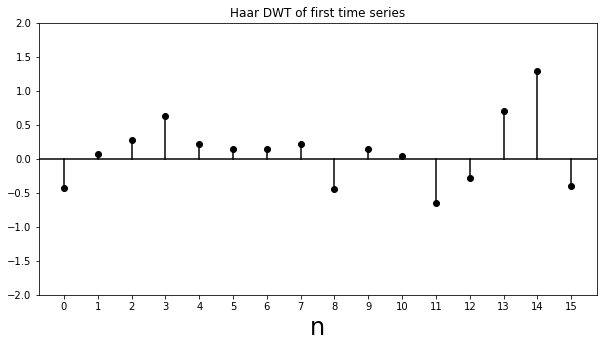

In [4]:
test1('ts16a.dat', 'ts16a_W.eps', 'Haar DWT of first time series')

Compute DWT of the second time series from WMTSA.

Reproduce the lower plot of Figure 62 in WMTSA.

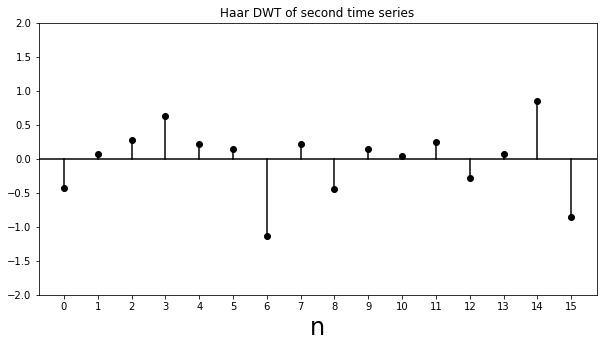

In [5]:
test1('ts16b.dat', 'ts16b_W.eps', 'Haar DWT of second time series')

In [6]:
def test2(name_input, name_output, title, name_filter):
    """
    Reproduce plots of Figures 64 and 65 from WMTSA

    Input:
        type name_input = string
        name_input = Name of file containing time series
        type name_output = string
        name_output = Name of image file containing the plot
        type title = string
        title = Title to add to the plot
        type name_filter = string
        name_filter = Name of the wavelet filter
    Output:
        None
    """
    X = np.loadtxt('../data/' + name_input)
    N = np.shape(X)[0]
    W = pyramid(X, name_filter, 4)
    (D, S) = get_DS(X, W, name_filter, 4)
    xticks_labels = []
    for i in range(0, N):
        xticks_labels.append(str(i))
    plt.figure(1, figsize=(30, 25))
    # Plot details
    for j in range(1, 5):
        plt.subplot2grid((5, 3), (j, 0))
        for i in range(0, N):
            plt.plot(np.array([i, i]), np.array([0.0, D[j - 1][i]]), 'k-')
            plt.plot(i, D[j - 1][i], 'ko')
        plt.axhline(0, color='k')
        plt.xticks(np.arange(0, N), xticks_labels)
        plt.ylim([- 2.0, 2.0])
        if (j == 4):
            plt.xlabel('n', fontsize=24)
    # Plot smooths
    for j in range(0, 5):
        plt.subplot2grid((5, 3), (j, 1))
        for i in range(0, N):
            plt.plot(np.array([i, i]), np.array([0.0, S[j][i]]), 'k-')
            plt.plot(i, S[j][i], 'ko')
        plt.axhline(0, color='k')
        plt.xticks(np.arange(0, N), xticks_labels)
        plt.ylim([- 2.0, 2.0])
        if (j == 4):
            plt.xlabel('n', fontsize=24)
    # Plot roughs
    for j in range(0, 5):
        plt.subplot2grid((5, 3), (j, 2))
        for i in range(0, N):
            plt.plot(np.array([i, i]), np.array([0.0, X[i] - S[j][i]]), 'k-')
            plt.plot(i, X[i] - S[j][i], 'ko')
        plt.axhline(0, color='k')
        plt.xticks(np.arange(0, N), xticks_labels)
        plt.ylim([- 2.0, 2.0])
        if (j == 4):
            plt.xlabel('n', fontsize=24)
    plt.suptitle(title, fontsize=30)
    plt.savefig('../figures/DWT/' + name_output, format='eps')
    plt.show()

Compute details, smooths and roughs of the first time series from WMTSA using the Haar wavelet filter.

Reproduce the upper plot of Figure 64 in WMTSA.

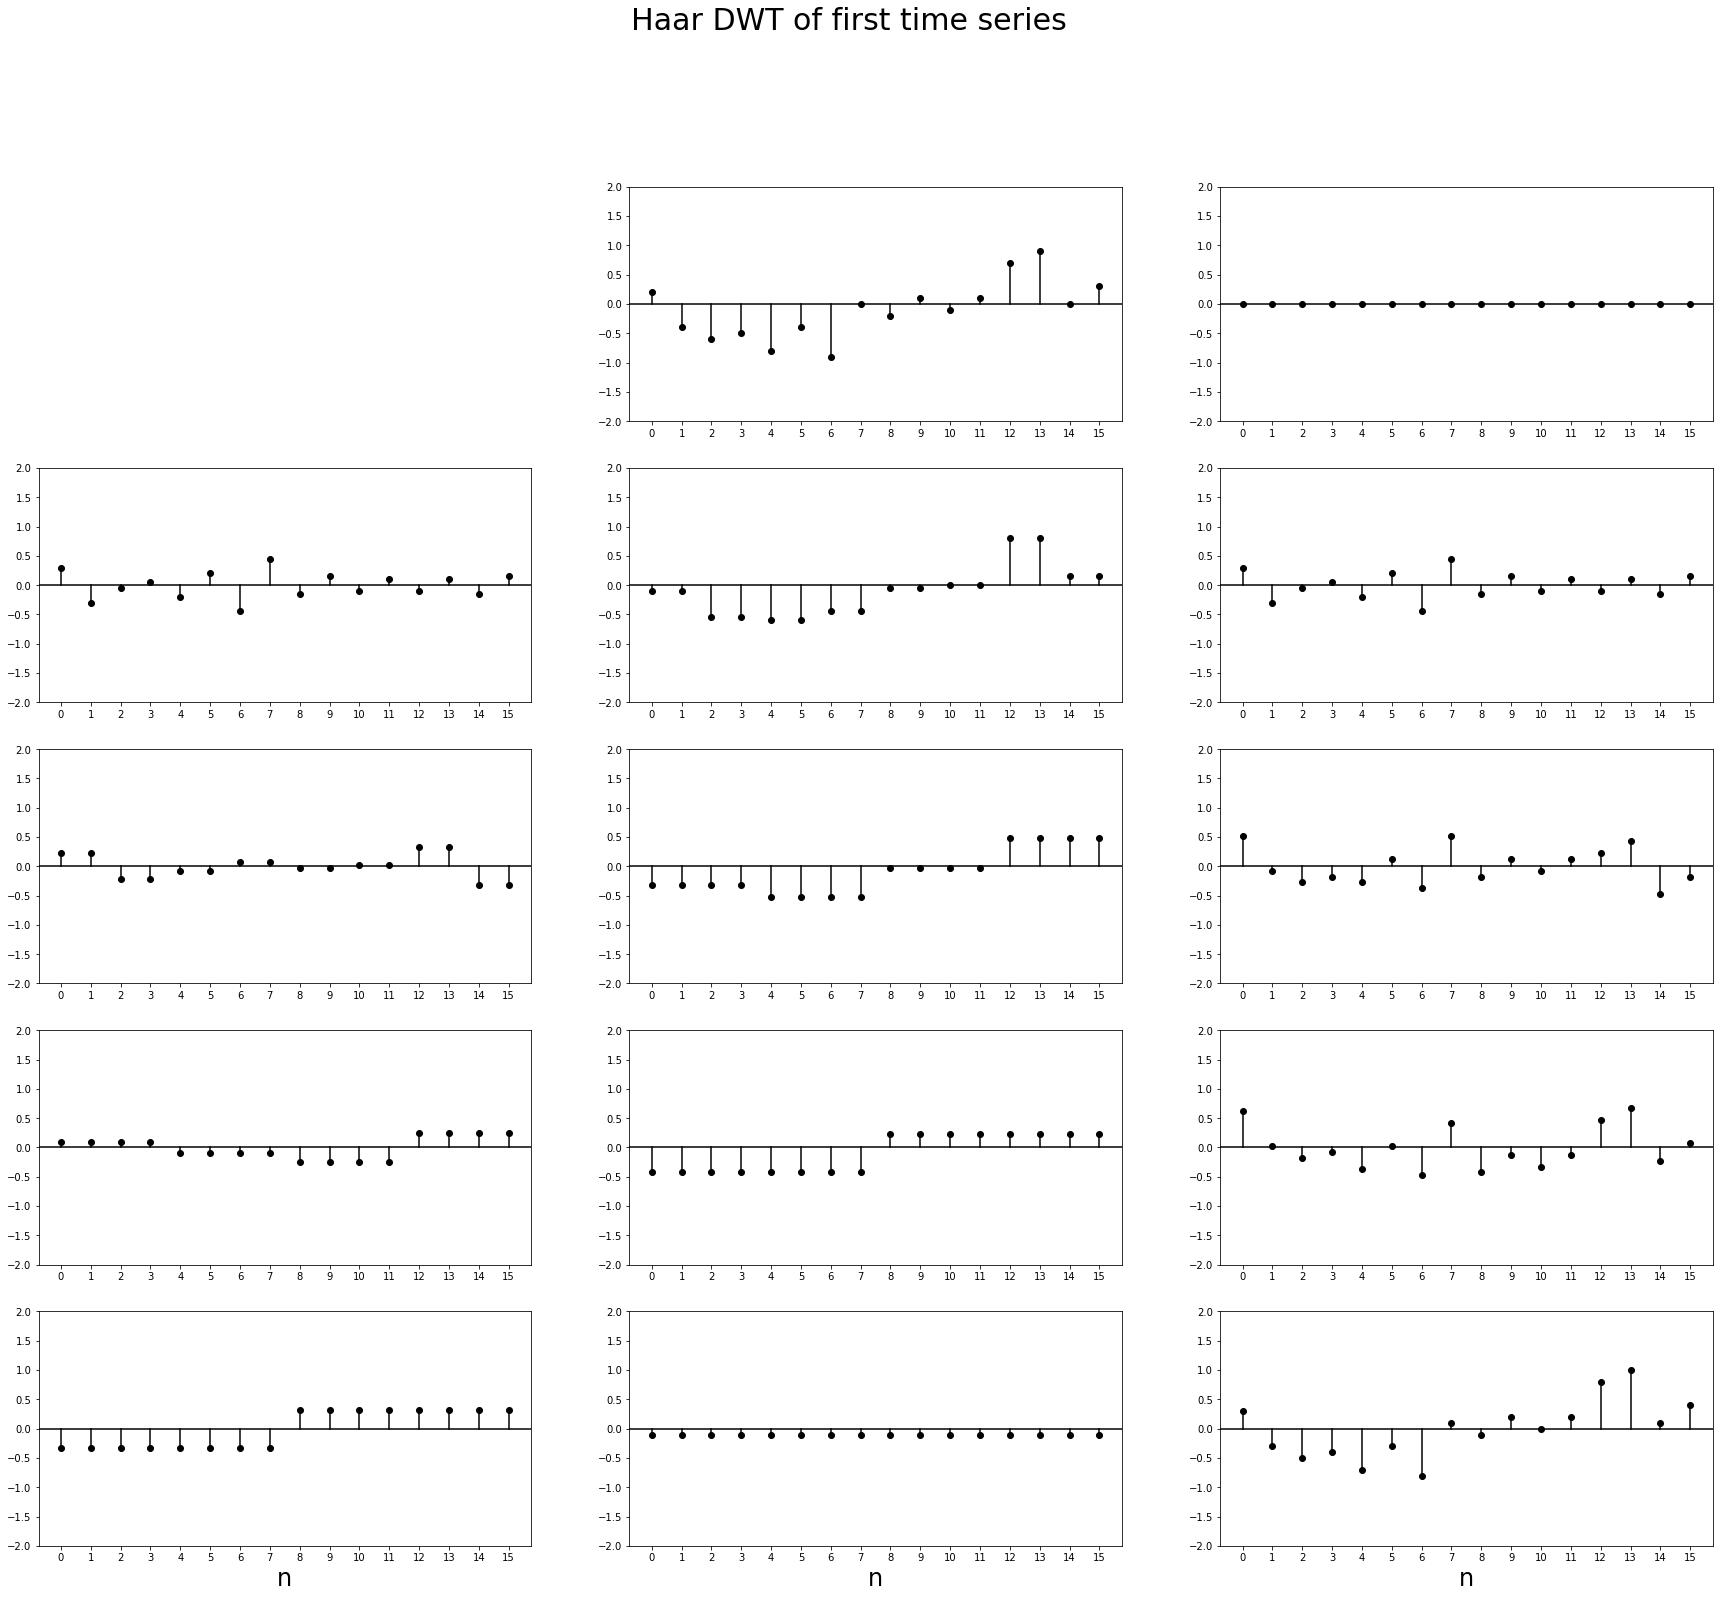

In [7]:
test2('ts16a.dat', 'ts16a_DSR_Haar.eps', 'Haar DWT of first time series', 'Haar')

Compute details, smooths and roughs of the second time series from WMTSA using the Haar wavelet filter.

Reproduce the lower plot of Figure 64 in WMTSA.

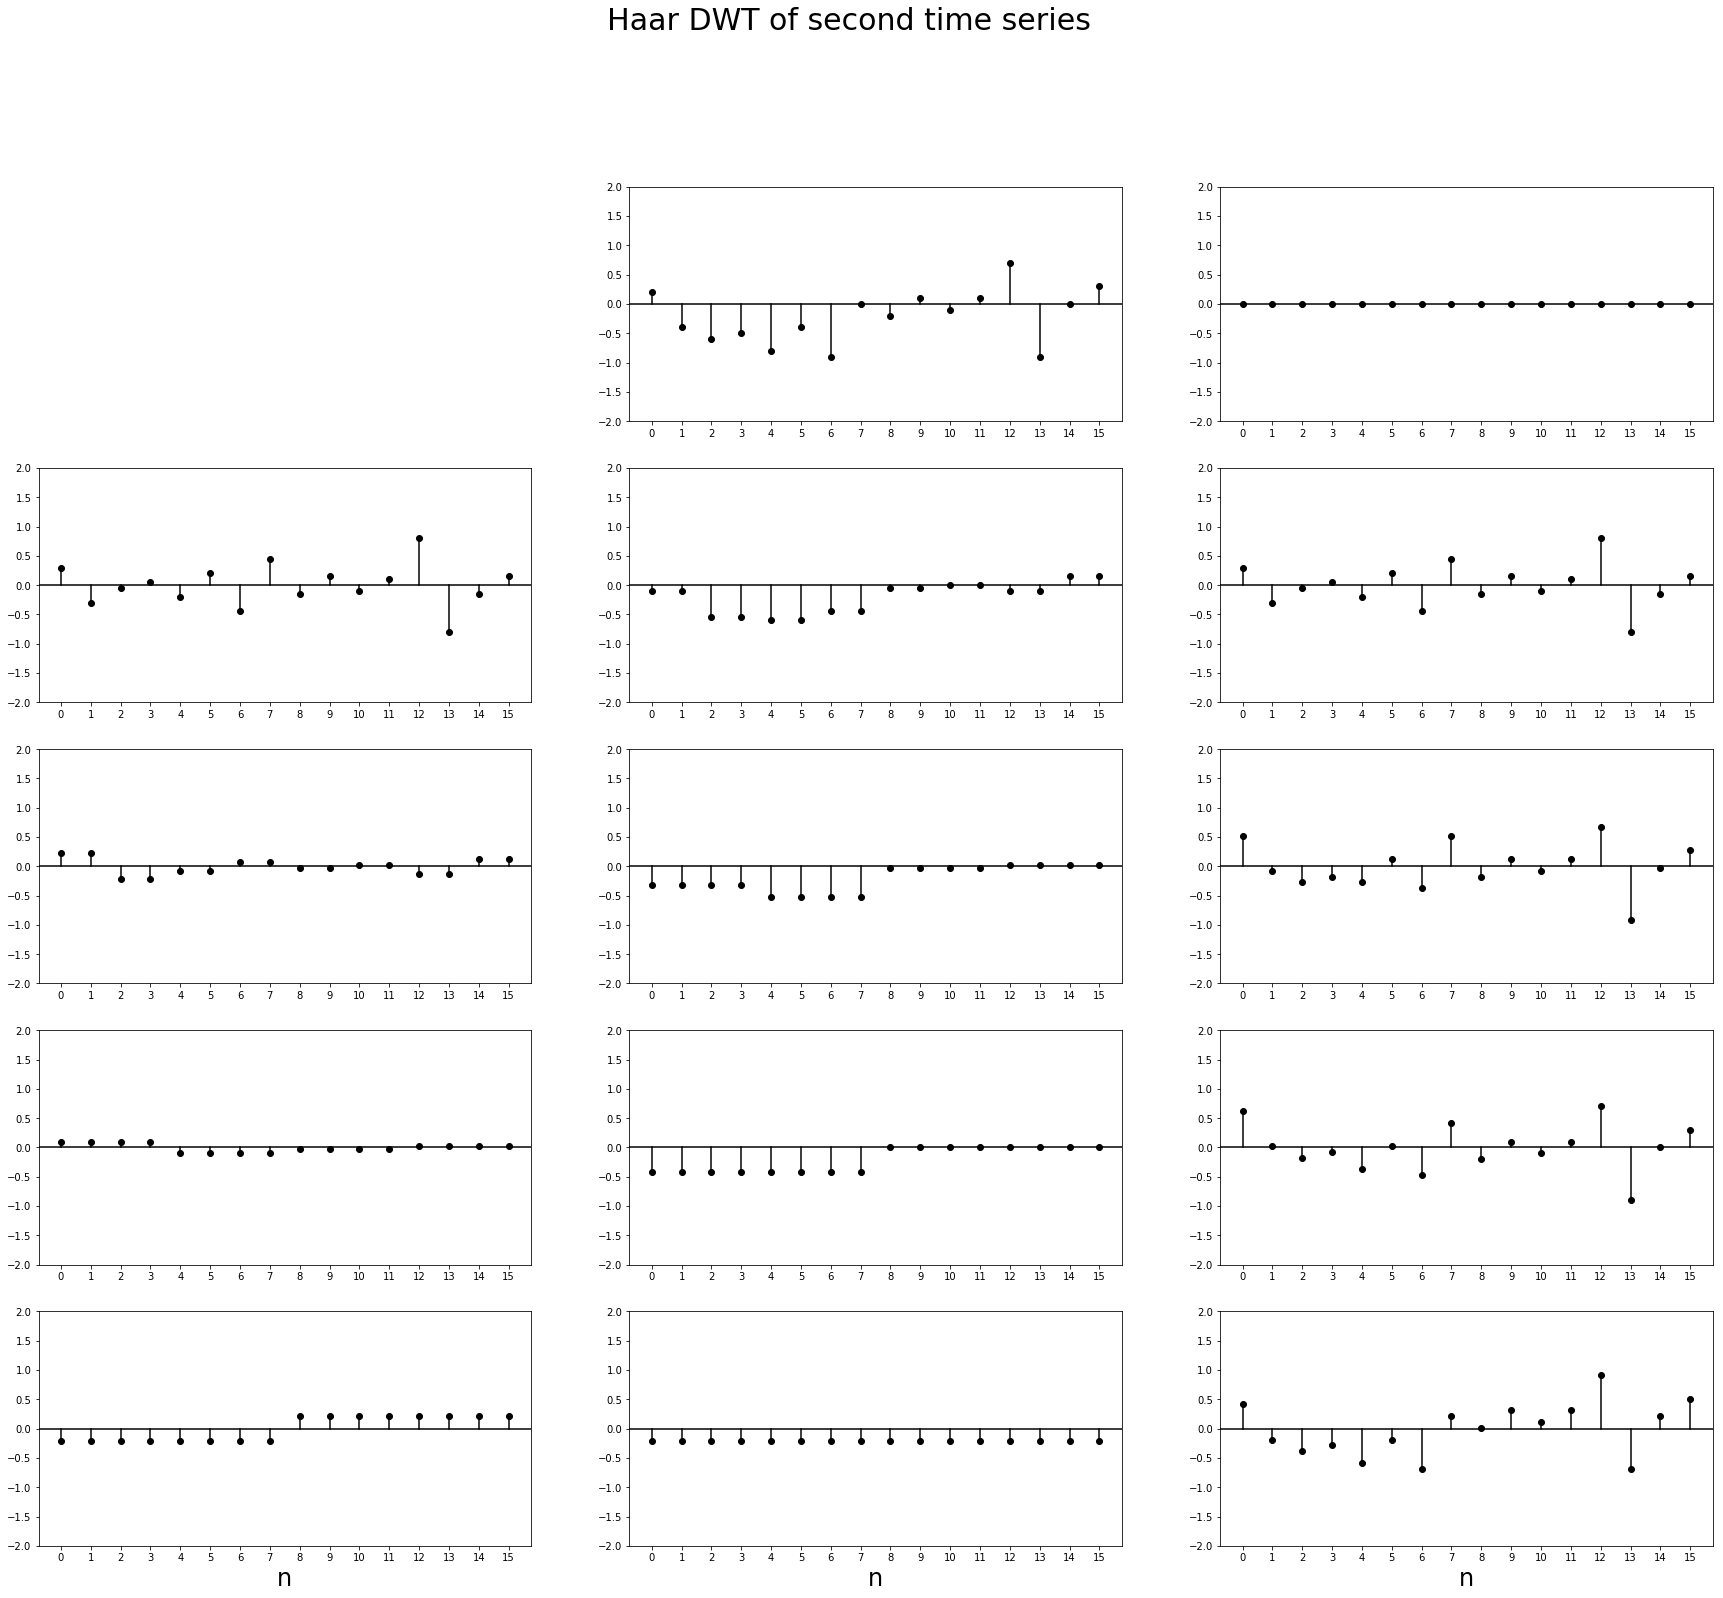

In [8]:
test2('ts16b.dat', 'ts16b_DSR_Haar.eps', 'Haar DWT of second time series', 'Haar')

Compute details, smooths and roughs of the first time series from WMTSA using the D(4) wavelet filter.

Reproduce the upper plot of Figure 65 in WMTSA.

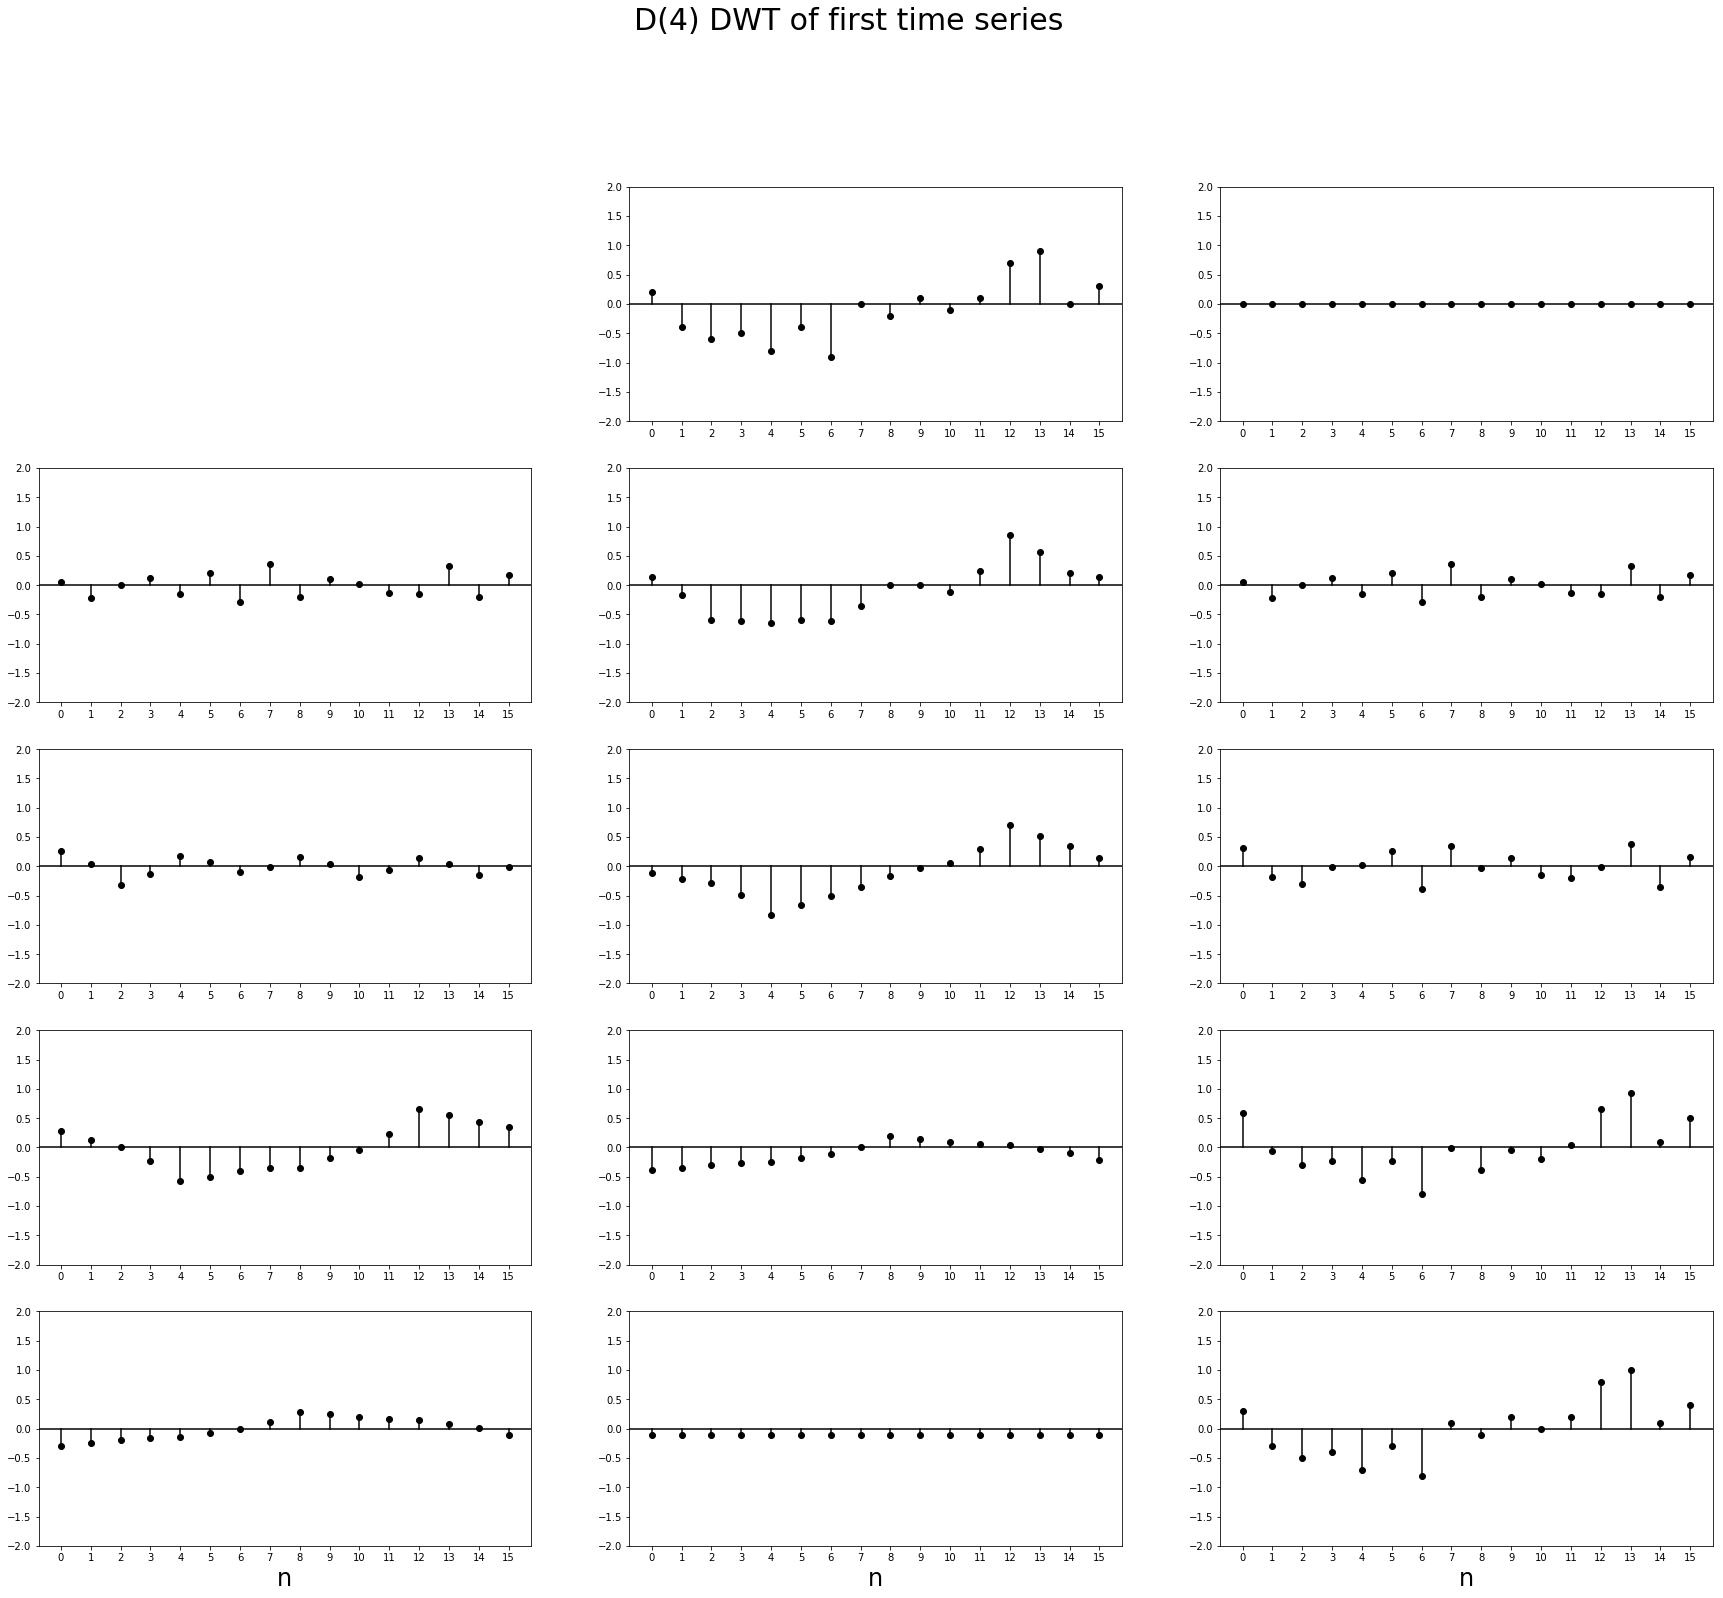

In [9]:
test2('ts16a.dat', 'ts16a_DSR_D4.eps', 'D(4) DWT of first time series', 'D4')

Compute details, smooths and roughs of the second time series from WMTSA using the D(4) wavelet filter.

Reproduce the lower plot of Figure 65 in WMTSA.

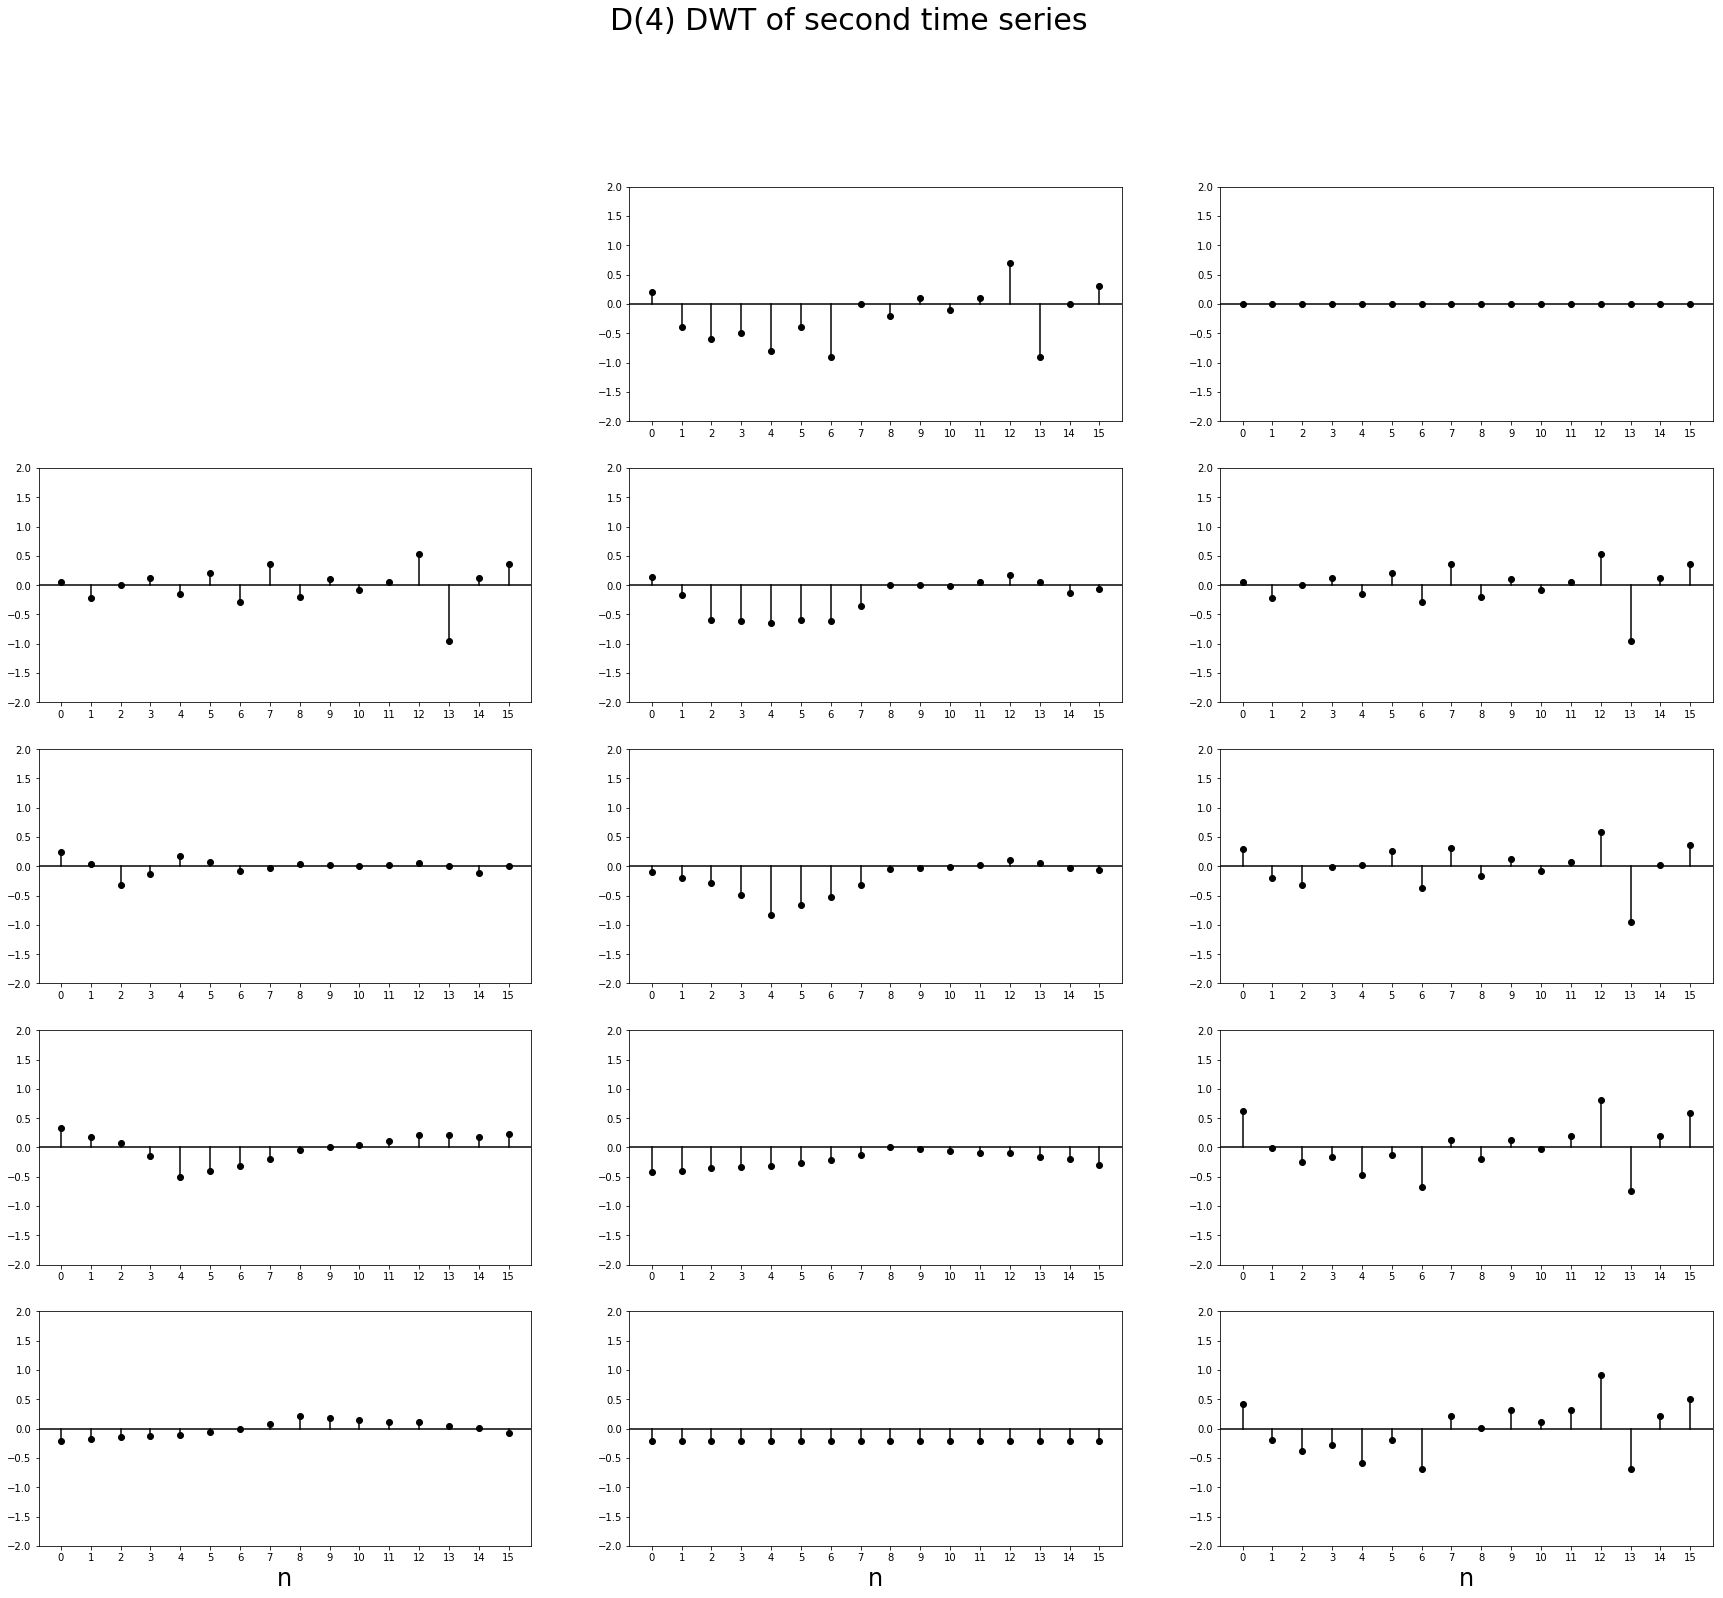

In [10]:
test2('ts16b.dat', 'ts16b_DSR_D4.eps', 'D(4) DWT of second time series', 'D4')

## 4.10 Example: Electrocardiogram Data

In [11]:
def test3():
    """
     Reproduce plot of Figure 126 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/heart.dat')
    N = np.shape(X)[0]
    wavelet_filters = ['Haar', 'D4', 'C6', 'LA8']
    plt.figure(1, figsize=(10, 20))
    for k in range(0, 4):
        plt.subplot2grid((4, 1), (k, 0))
        W = pyramid(X, wavelet_filters[k], 6)
        for i in range(0, N):
            plt.plot(np.array([i, i]), np.array([0.0, W[i]]), 'k-')
        plt.axhline(0, color='k')
        plt.xlim([0, N - 1])
        plt.ylim([- 4.0, 4.0])
        plt.title(wavelet_filters[k])
    plt.savefig('../figures/DWT/ECG_W.eps', format='eps')
    plt.show()

Compute DWT of the ECG time series from WMTSA.

Reproduce Figure 126 in WMTSA.

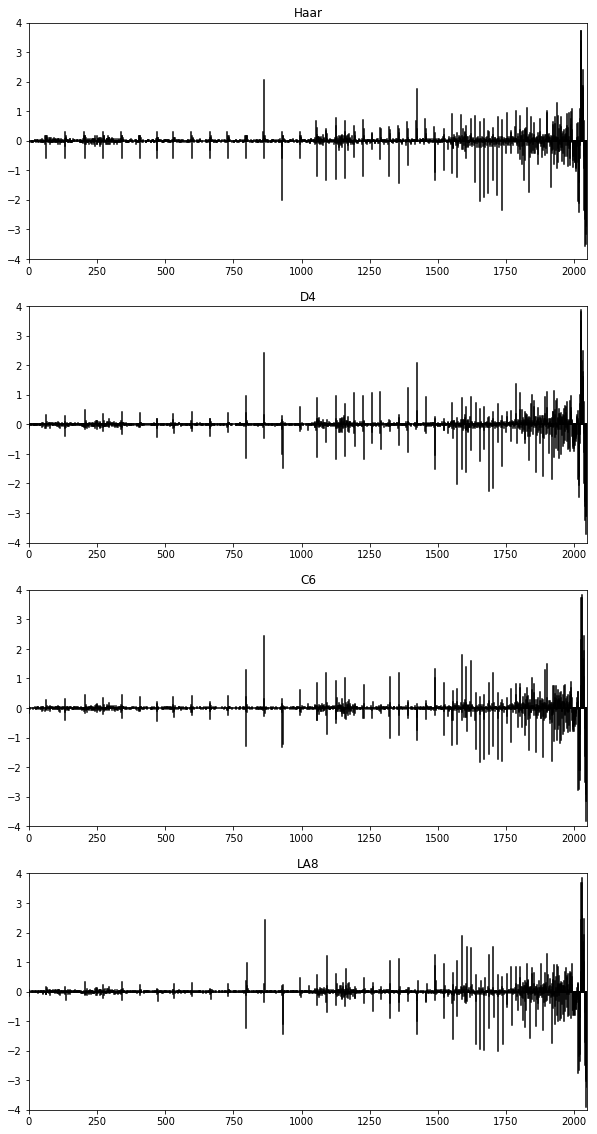

In [12]:
test3()

In [13]:
def test4():
    """
    Reproduce plots of Figures 127 and 138 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/heart.dat')
    N = np.shape(X)[0]
    W = pyramid(X, 'LA8', 6)
    (nuH, nuG) = get_nu('LA8', 6)
    (gamHb, gamHe, gamGb, gamGe) = get_gamma('LA8', 6, N)
    dt = 1.0 / 180.0
    plt.figure(1, figsize=(15, 24))
    # Plot data
    plt.subplot2grid((8, 1), (7, 0))
    plt.plot(dt * np.arange(0, N), X, 'k', label='X')
    plt.xlim([0, dt * (N - 1)])
    plt.xlabel('t (seconds)')
    plt.legend(loc=1)
    # Plot wavelet coefficients at each level
    for j in range(1, 7):
        Wj = W[- int(N / (2 ** (j - 1))) : - int(N / 2 ** j)]
        plt.subplot2grid((8, 1), (7 - j, 0))
        for t in range(0, int(N / 2 ** j)):
            tshift = dt * ((2 ** j * (t + 1) - 1 - abs(nuH[j - 1])) % N)
            if (t == 0):
                plt.plot((tshift, tshift), (0.0, Wj[t]), 'k', label='T' + str(nuH[j - 1]) + 'W' + str(j))
            else:
                plt.plot((tshift, tshift), (0.0, Wj[t]), 'k')
        plt.axvline(dt * gamHb[j - 1], linewidth=1, color='red')
        plt.axvline(dt * gamHe[j - 1], linewidth=1, color='red')
        plt.xlim([0, dt * (N - 1)])
        plt.legend(loc=1)
    # Plot scaling coefficients for the last level
    Vj = W[- int(N / (2 ** 6)) : ]
    plt.subplot2grid((8, 1), (0, 0))
    for t in range(0, int(N / 2 ** 6)):
        tshift = dt * ((2 ** 6 * (t + 1) - 1 - abs(nuG[5])) % N)
        if (t == 0):
            plt.plot((tshift, tshift), (0.0, Vj[t]), 'k', label='T' + str(nuG[5]) + 'V' + str(j))
        else:
            plt.plot((tshift, tshift), (0.0, Vj[t]), 'k')
    plt.axvline(dt * gamGb[5], linewidth=1, color='red')
    plt.axvline(dt * gamGe[5], linewidth=1, color='red')
    plt.xlim([0, dt * (N - 1)])
    plt.legend(loc=1)
    plt.savefig('../figures/DWT/ECG_W_LA8.eps', format='eps')
    plt.show()

Compute LA8 DWT of the ECG time series from WMTSA.

Reproduce Figures 127 and 138 in WMTSA.

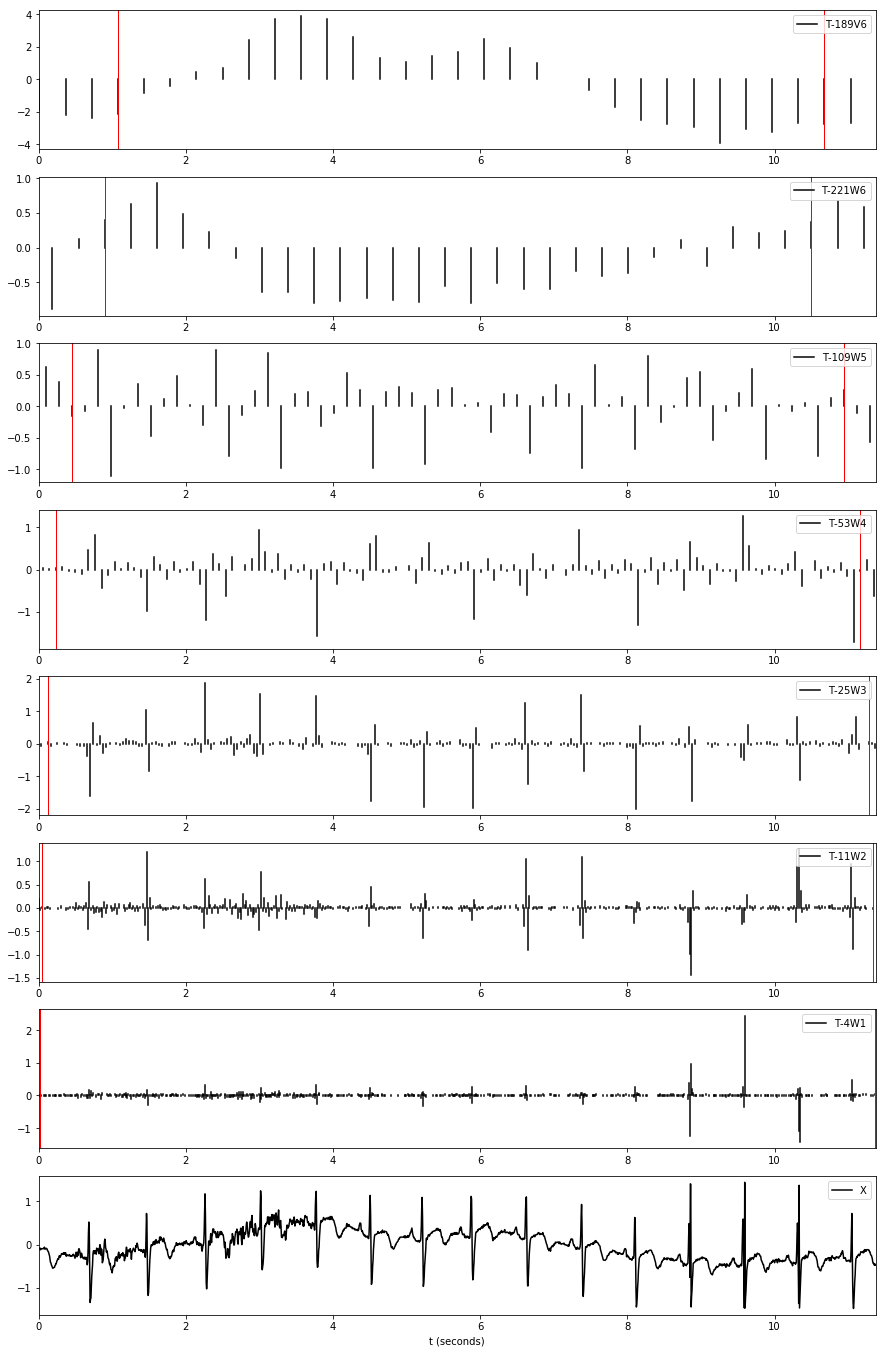

In [14]:
test4()

In [15]:
def test5(name_filter):
    """
    Reproduce plots of Figures 130 to 133 from WMTSA

    Input:
        type name_filter = string
        name_filter = Name of the wavelet filter
    Output:
        None
    """

    X = np.loadtxt('../data/heart.dat')
    N = np.shape(X)[0]
    W = pyramid(X, name_filter, 6)
    (D, S) = get_DS(X, W, name_filter, 6)
    L = np.shape(get_scaling(name_filter))[0]
    (indb, inde) = get_indices(L, 6, N)
    if (name_filter[0 : 2] == 'LA' or name_filter[0 : 1] == 'C'):
        (nuH, nuG) = get_nu('LA8', 6)
    dt = 1.0 / 180.0
    plt.figure(1, figsize=(15, 24))
    # Plot data
    plt.subplot2grid((8, 1), (7, 0))
    plt.plot(dt * np.arange(0, N), X, 'k', label='X')
    plt.xlim([0, dt * (N - 1)])
    plt.xlabel('t (seconds)')
    plt.legend(loc=1)
    # Plot details at each level
    for j in range(0, 6):
        plt.subplot2grid((8, 1), (6 - j, 0))
        plt.plot(dt * np.arange(0, N), D[j], 'k', label='D' + str(j + 1))
        plt.axvline(dt * indb[j], linewidth=1, color='red')
        plt.axvline(dt * inde[j], linewidth=1, color='red')
        plt.xlim([0, dt * (N - 1)])
        plt.legend(loc=1)
    # Plot smooth for the last level
    plt.subplot2grid((8, 1), (0, 0))
    plt.plot(dt * np.arange(0, N), S[6], 'k', label='S' + str(6))
    plt.axvline(dt * indb[5], linewidth=1, color='red')
    plt.axvline(dt * inde[5], linewidth=1, color='red')
    plt.xlim([0, dt * (N - 1)])
    plt.legend(loc=1)
    plt.savefig('../figures/DWT/ECG_DS_' + name_filter + '.eps', format='eps')
    plt.show()

Compute Haar DWT MRA of the ECG time series from WMTSA.

Reproduce Figure 130 in WMTSA.

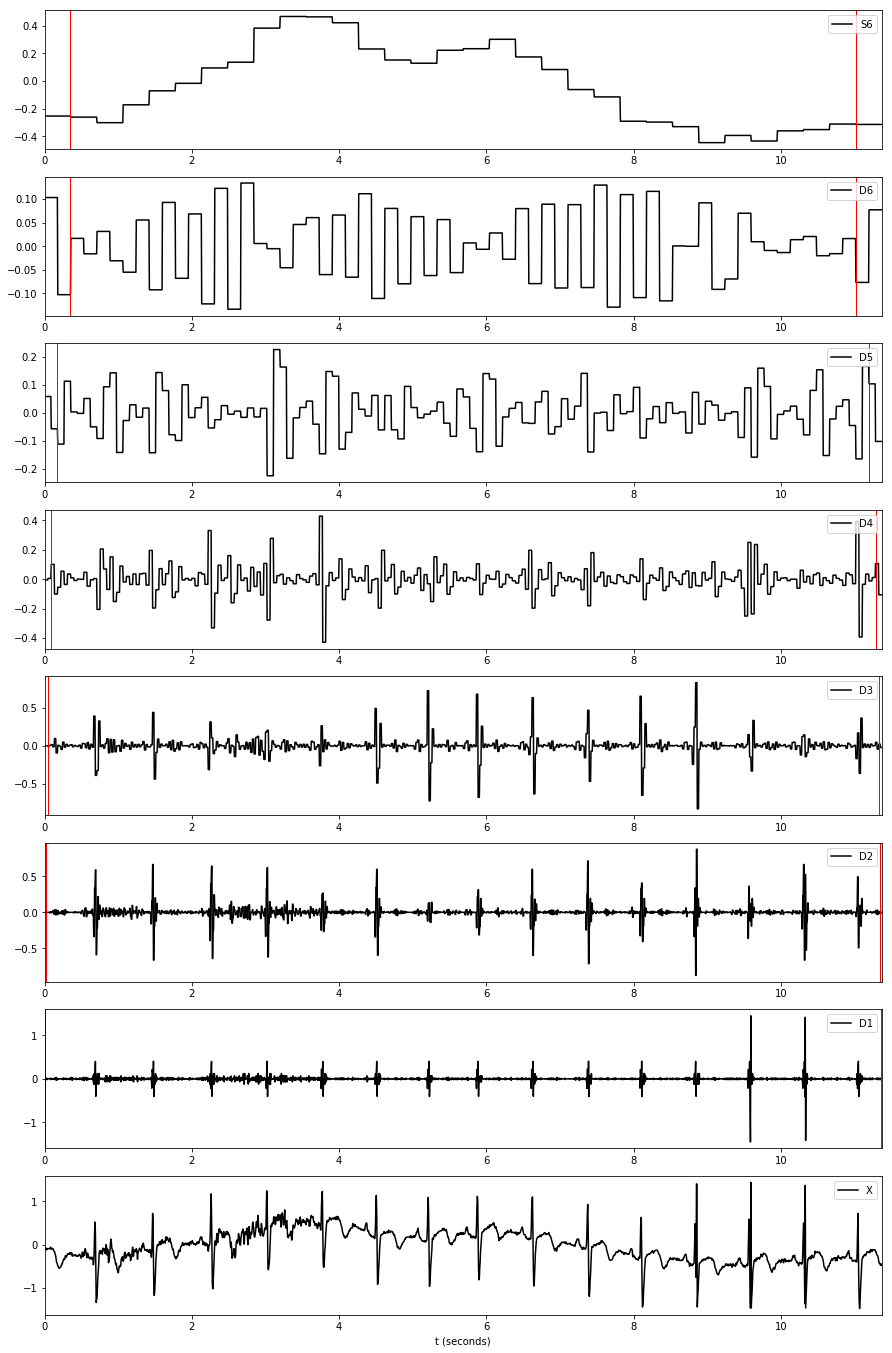

In [16]:
test5('Haar')

Compute D4 DWT MRA of the ECG time series from WMTSA.

Reproduce Figure 131 in WMTSA.

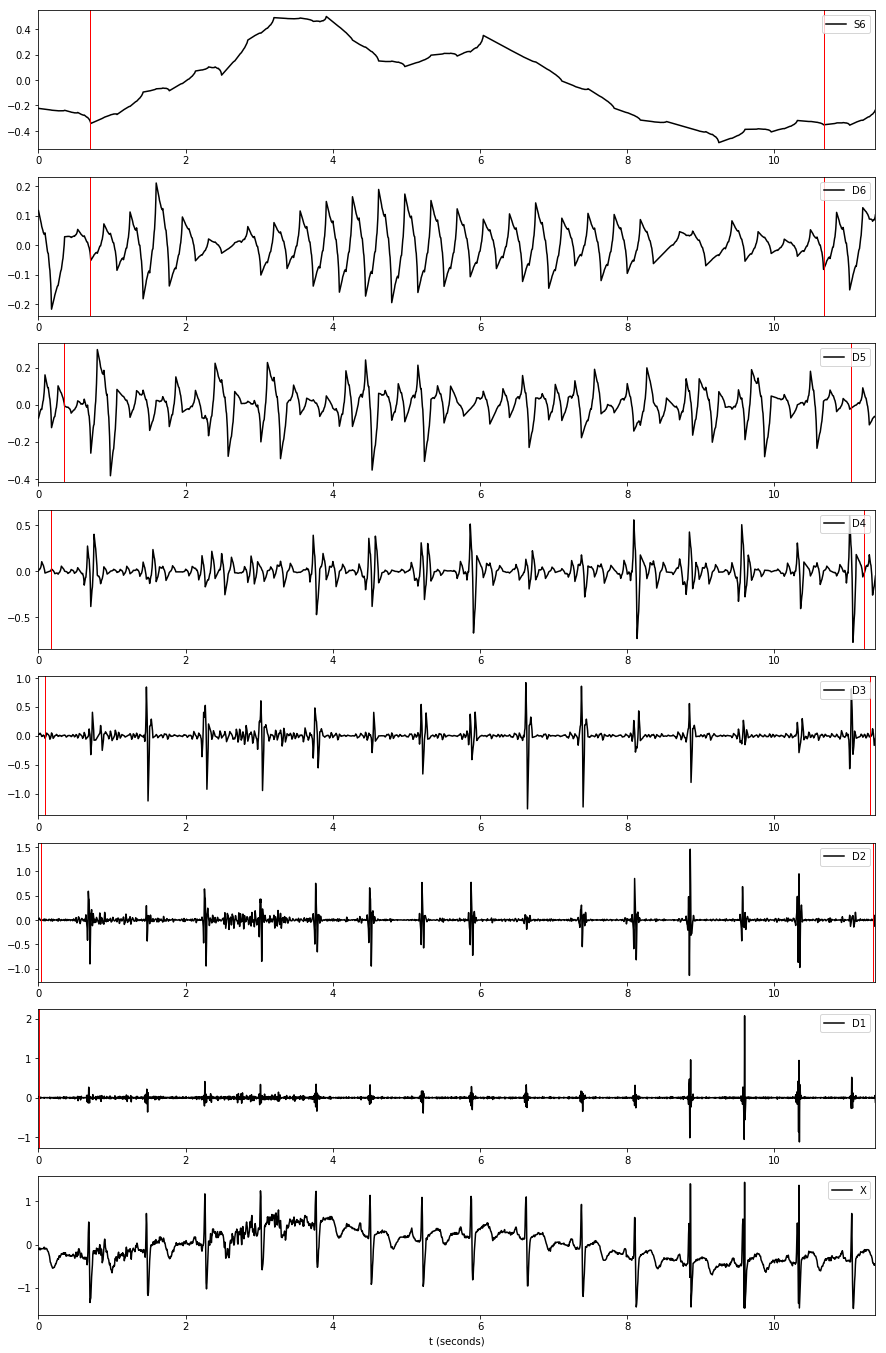

In [17]:
test5('D4')

Compute C6 DWT MRA of the ECG time series from WMTSA.

Reproduce Figure 132 in WMTSA.

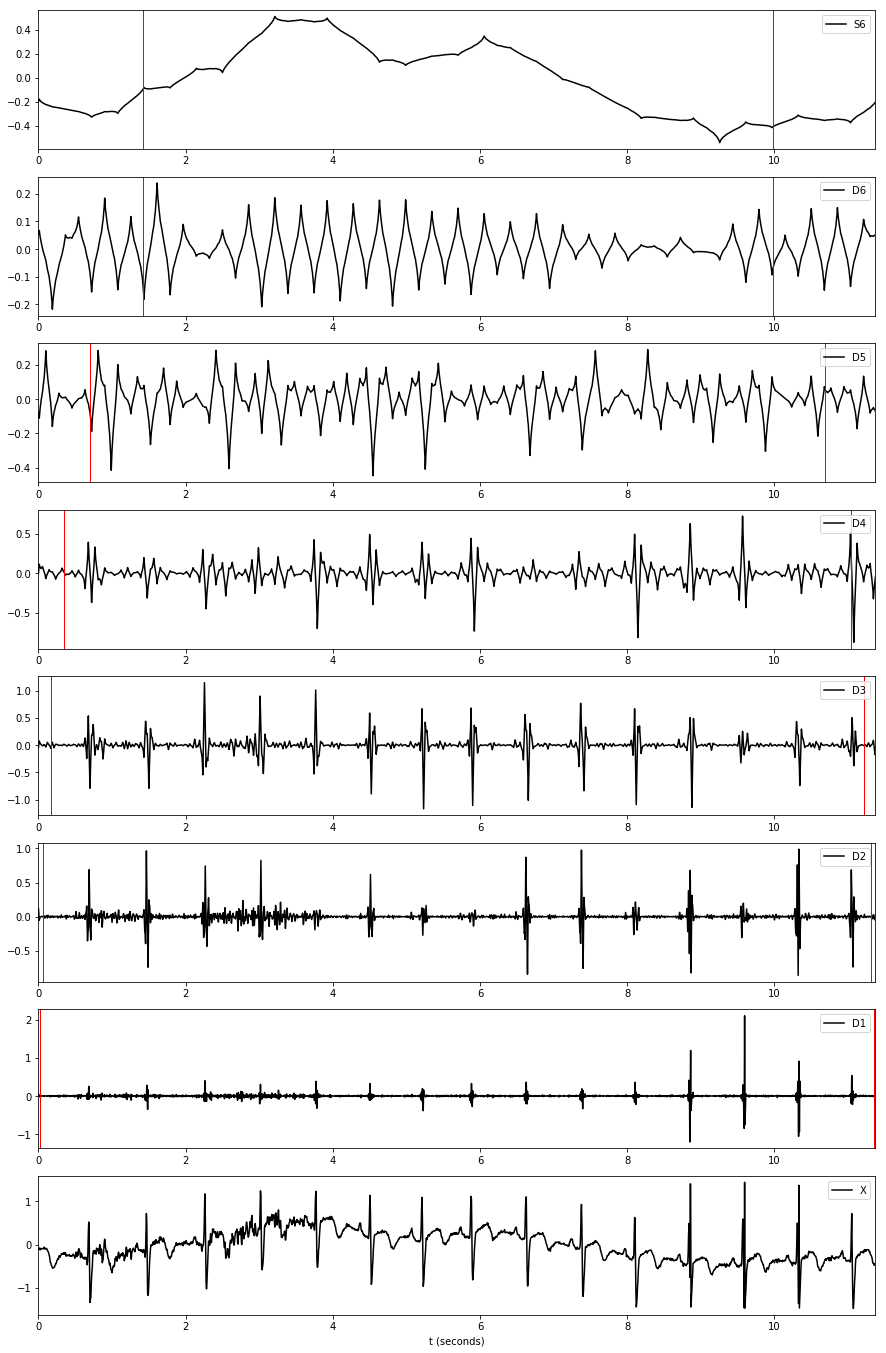

In [18]:
test5('C6')

Compute LA8 DWT MRA of the ECG time series from WMTSA.

Reproduce Figures 133 and 140 in WMTSA.

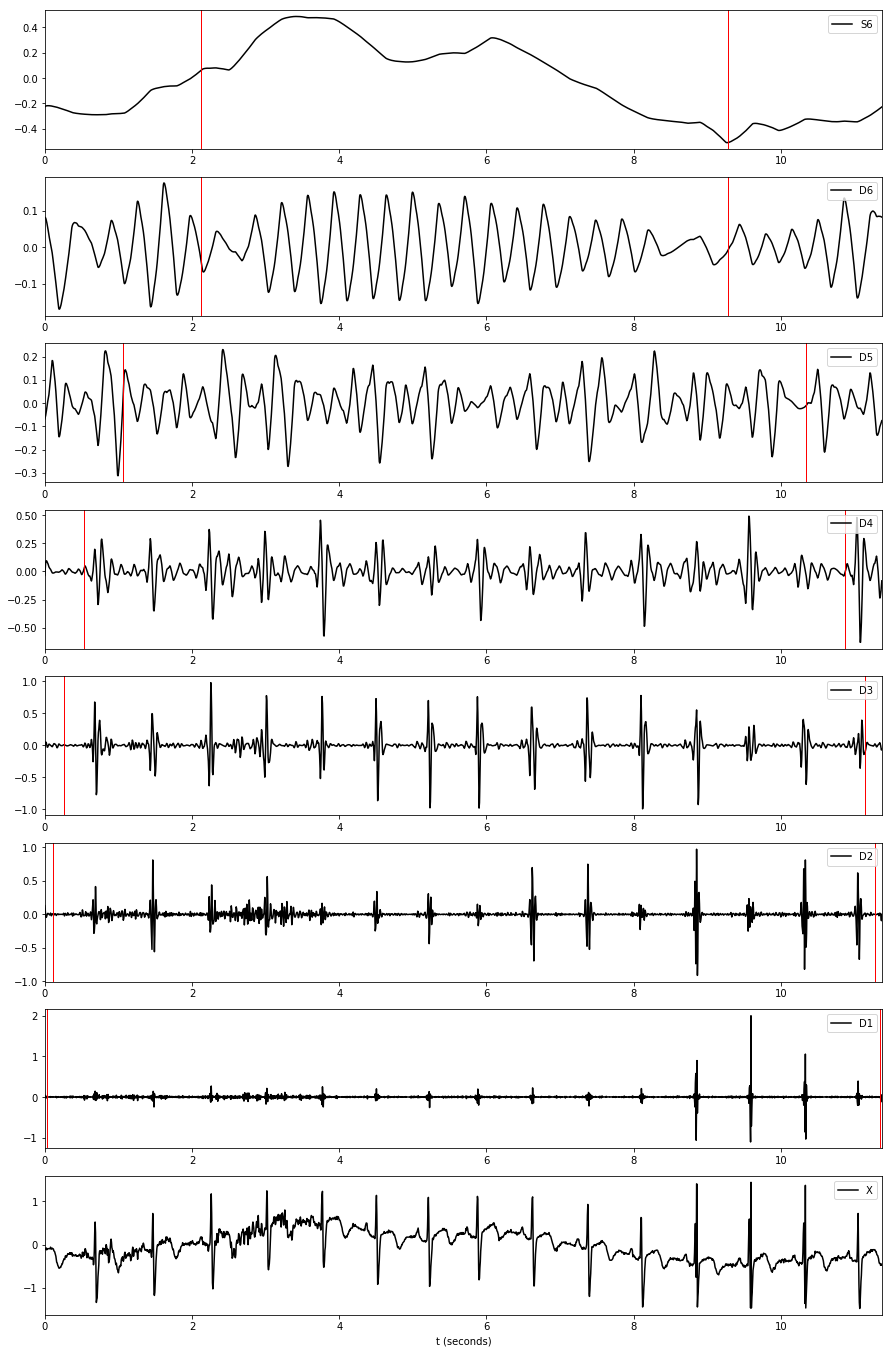

In [19]:
test5('LA8')